In [1]:
import requests
payload={
'qdate':'105/05/13',
'select2':'24',
'sorting':'by_issue'    
}
url = 'http://www.twse.com.tw/ch/trading/fund/T86/T86.php'
res = requests.post(url, data=payload)

In [4]:
#print res.text

In [6]:
from bs4 import BeautifulSoup as bs
soup = bs(res.text)
tb = soup.select('#tbl-sortable')[0]

In [7]:
import pandas as pd
dfs = pd.read_html(tb.prettify('utf-8'), encoding='utf-8')

In [9]:
dfs[0].head()

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數
0,2408,南亞科,18079000,4097000,13982000,0,0,0,329000,317000,17000,300000,154000,125000,29000,14311000
1,3474,華亞科,9560000,4665000,4895000,0,0,0,113000,201000,30000,171000,0,58000,-58000,5008000
2,2449,京元電,8513011,4469755,4043256,58000,490000,-432000,472000,0,107000,-107000,1266000,687000,579000,4083256
3,3413,京鼎,529000,24000,505000,0,0,0,-1000,0,1000,-1000,0,0,0,504000
4,3016,嘉晶,440000,91000,349000,0,0,0,-12000,2000,14000,-12000,0,0,0,337000


In [19]:
from datetime import datetime, timedelta
print datetime.now()
#print datetime.now() - datetime.timedelta(days = 1)
currentdate = datetime.now()


for i in range(1,10):
    ymd = currentdate - timedelta(days = i)
    year = str(int(ymd.strftime('%Y')) - 1911)
    monthdate = ymd.strftime('/%m/%d')
    print year + monthdate
           

2016-05-15 09:37:17.229000
105/05/14
105/05/13
105/05/12
105/05/11
105/05/10
105/05/09
105/05/08
105/05/07
105/05/06


In [20]:
def getTWDate(dt):
    year = int(dt.strftime('%Y')) - 1911
    monthdate = dt.strftime('%m/%d')
    ymd = '{}/{}'.format(year, monthdate)
    return ymd

In [43]:
url = 'http://www.twse.com.tw/ch/trading/fund/T86/T86.php'
payload={
'qdate':'105/05/13',
'select2':'24',
'sorting':'by_issue'    
}
from bs4 import BeautifulSoup as bs
import pandas as pd

def getTradingVolume(date):
    payload['qdate'] = getTWDate(date)
    res = requests.post(url, data=payload)    
    soup = bs(res.text)
    tb = soup.select('#tbl-sortable')[0]
    dfs = pd.read_html(tb.prettify('utf-8'), encoding='utf-8')
    stockdf = dfs[0]
    stockdf['date'] = date.date()
    return stockdf

In [44]:
dt = datetime.strptime('2016/05/12', '%Y/%m/%d')

In [45]:
dt
print dt.date()

2016-05-12


In [46]:
df = getTradingVolume(dt)

In [47]:
#df

In [52]:
import requests

currentdate = datetime.now()
dfall = []
for i in range(1,30):
    ymd = currentdate - timedelta(days = i)
    df = getTradingVolume(ymd)
    dfall.append(df)

In [53]:
len(dfall)

29

In [57]:
stockdf = pd.concat(dfall)

In [56]:
#dftotal

In [58]:
stockdf.columns


Index([            u'證券  代號',             u'證券  名稱',           u'外資  買進股數',
                 u'外資  賣出股數',          u'外資  買賣超股數',           u'投信  買進股數',
                 u'投信  賣出股數',          u'投信  買賣超股數',         u'自營商  買賣超股數',
        u'自營商  買進股數  (自行買賣)',  u'自營商  賣出股數  (自行買賣)', u'自營商  買賣超股數  (自行買賣)',
          u'自營商  買進股數  (避險)',    u'自營商  賣出股數  (避險)',   u'自營商  買賣超股數  (避險)',
              u'三大法人  買賣超股數',               u'date'],
      dtype='object')

In [62]:
df2330 = stockdf[stockdf[u'證券  代號'] == 2330]

In [63]:
df2330.head()

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數,date
66,2330,台積電,21174000,54670407,-33496407,329000,9000,320000,934000,1306000,328000,978000,384000,428000,-44000,-32242407,2016-05-13
67,2330,台積電,12719000,19946830,-7227830,54000,200000,-146000,-712000,81000,573000,-492000,180000,400000,-220000,-8085830,2016-05-12
70,2330,台積電,23622636,40207253,-16584617,461938,40000,421938,-156000,688000,493000,195000,355000,706000,-351000,-16318679,2016-05-11
68,2330,台積電,27595804,36472619,-8876815,124107,0,124107,444000,692000,708000,-16000,570000,110000,460000,-8308708,2016-05-10
71,2330,台積電,24509300,34812293,-10302993,145000,0,145000,-905000,61000,1018000,-957000,258000,206000,52000,-11062993,2016-05-09


In [64]:
df2330.describe()

,證券 代號,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數
count,19,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2330,22138587.842105,33736859.526316,-11598271.684211,109791.842105,237828.421053,-128036.578947,460171.052632,646263.157895,371157.894737,275105.263158,706421.052632,521355.263158,185065.789474,-11266137.210526
std,0,6805220.410908,16872066.956777,14408106.192703,124063.276872,290786.082910,360325.253183,1268529.128144,628386.367532,271460.302635,769795.852789,548304.894479,548826.897471,802783.317547,13663364.764087
min,2330,11925989.000000,9734929.000000,-47307028.000000,0.000000,0.000000,-1187000.000000,-2240749.000000,43000.000000,37000.000000,-957000.000000,180000.000000,59000.000000,-2036749.000000,-45206028.000000
25%,2330,16411205.000000,18224430.000000,-16441120.500000,13500.000000,40500.000000,-265000.000000,-64500.000000,60500.000000,185000.000000,-179000.000000,322000.000000,198000.000000,-21000.000000,-15718651.500000
50%,2330,23622636.000000,34812293.000000,-8876815.000000,84000.000000,165000.000000,-146000.000000,363000.000000,393000.000000,259000.000000,-16000.000000,423000.000000,355000.000000,112000.000000,-8308708.000000
75%,2330,25227748.000000,40945676.500000,-4878821.000000,136000.000000,294500.000000,99053.500000,1230500.000000,1175500.000000,533000.000000,993000.000000,1054500.000000,690500.500000,547000.000000,-4137110.000000
max,2330,37765618.000000,66262467.000000,11166864.000000,461938.000000,1187000.000000,421938.000000,2868000.000000,2046000.000000,1018000.000000,1840000.000000,2145000.000000,2336749.000000,1587000.000000,9809864.000000


In [65]:
?df2330.plot

In [67]:
%ls

 磁碟區 C 中的磁碟是 OS 7
 磁碟區序號:  C485-A13C

 C:\Users\User\pyfinance 的目錄

2016/05/15  上午 09:55    <DIR>          .
2016/05/15  上午 09:55    <DIR>          ..
2016/03/28  上午 09:41               826 .gitignore
2016/05/15  上午 09:17    <DIR>          .ipynb_checkpoints
2016/05/08  上午 01:37         3,745,521 20160508 Python網路爬蟲入門-財經為例.pdf
2016/05/08  上午 01:37         3,693,897 20160508 Python網路爬蟲入門-財經為例.pptx
2016/05/09  下午 06:00           127,887 20160508Demo.ipynb
2016/05/15  上午 09:55            30,675 20160515Demo.ipynb
2016/05/15  上午 07:42             1,730 downlad.csv
2016/05/08  上午 01:36         1,385,472 finance.sqlite
2016/03/28  下午 03:48            34,380 foo.png
2016/05/10  下午 11:21           463,539 location.png
2016/05/08  上午 10:27           417,212 lunch.jpg
2016/05/08  上午 11:04           321,575 lunch2.jpg
2016/03/28  下午 03:20    <DIR>          names
2016/05/08  上午 01:39    <DIR>          old
2015/12/31  上午 01:17            30,969 pandas_readhtml.ipynb
2016/05/08  上午 01:39            

In [68]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


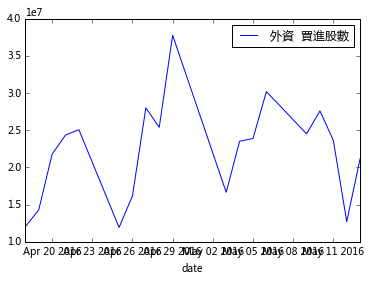

In [69]:
df2330.plot(kind="line", x = 'date', y = u'外資  買進股數')

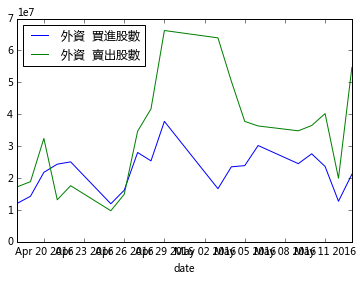

In [71]:
df2330.plot(kind="line", x = 'date', y = [u'外資  買進股數', u'外資  賣出股數'])

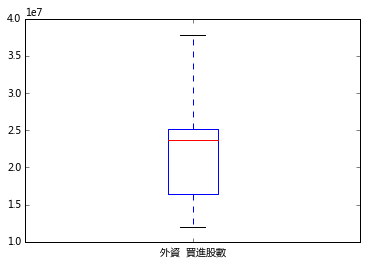

In [70]:
df2330.plot(kind="box", y = u'外資  買進股數')

## 三大法人買賣超日報 

In [75]:
from bs4 import BeautifulSoup as bs
from datetime import datetime, timedelta
import pandas as pd

In [132]:
url = 'http://www.twse.com.tw/ch/trading/fund/T86/T86.php'
payload={
'qdate':'105/05/13',
'select2':'24',
'sorting':'by_issue'    
}

In [133]:

def getTWDate(dt):
    year = int(dt.strftime('%Y')) - 1911
    monthdate = dt.strftime('%m/%d')
    ymd = '{}/{}'.format(year, monthdate)
    return ymd

def getTradingVolume(date):
    payload['qdate'] = getTWDate(date)
    res = requests.post(url, data=payload)    
    soup = bs(res.text)
    tb = soup.select('#tbl-sortable')[0]
    dfs = pd.read_html(tb.prettify('utf-8'), encoding='utf-8')
    stockdf = dfs[0]
    stockdf['date'] = date.date()
    return stockdf

In [134]:
import requests

currentdate = datetime.now()
dfall = []
for i in range(1,3):
    ymd = currentdate - timedelta(days = i)
    df = getTradingVolume(ymd)
    dfall.append(df)

In [135]:
stockdf = pd.concat(dfall)

## SQLite 操作

In [100]:
import sqlite3 as lite
con = lite.connect('finance2.sqlite')
con.close()

In [101]:
import sqlite3 as lite
con = lite.connect('finance2.sqlite')
cur = con.cursor()
cur.execute('SELECT SQLITE_VERSION()')
data = cur.fetchone()
print data
con.close()

(u'3.6.21',)


In [102]:
import sqlite3 as lite
con = lite.connect('finance2.sqlite')
cur = con.cursor()

cur.execute("DROP TABLE IF EXISTS PhoneAddress") 
cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)") 
cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
con.commit()
cur.execute("SELECT phone,address FROM PhoneAddress") 

data = cur.fetchall()
print data
con.close()

[(u'0912173381', u'United State'), (u'0928375018', u'Tokyo Japan'), (u'0957209108', u'Taipei')]


In [103]:
import sqlite3 as lite
con = lite.connect('finance2.sqlite')
cur = con.cursor()

cur.execute("SELECT phone,address FROM PhoneAddress") 

data = cur.fetchone()
print data[0], data[1]

data = cur.fetchall()
print data
con.close()

0912173381 United State
[(u'0928375018', u'Tokyo Japan'), (u'0957209108', u'Taipei')]


In [104]:
a = (1,2)
b = [1,2]
dir(b)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__delslice__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getslice__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__setslice__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [105]:
stockdf.head()

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數,date
0,2408,南亞科,18079000,4097000,13982000,0,0,0,329000,317000,17000,300000,154000,125000,29000,14311000,2016-05-13
1,3474,華亞科,9560000,4665000,4895000,0,0,0,113000,201000,30000,171000,0,58000,-58000,5008000,2016-05-13
2,2449,京元電,8513011,4469755,4043256,58000,490000,-432000,472000,0,107000,-107000,1266000,687000,579000,4083256,2016-05-13
3,3413,京鼎,529000,24000,505000,0,0,0,-1000,0,1000,-1000,0,0,0,504000,2016-05-13
4,3016,嘉晶,440000,91000,349000,0,0,0,-12000,2000,14000,-12000,0,0,0,337000,2016-05-13


In [106]:
import sqlite3 as lite
con = lite.connect('finance2.sqlite')
stockdf.to_sql(name = 'trading_volume', index=False, con = con, if_exists="replace")
#con.commit()
con.close()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  app.launch_new_instance()


In [136]:

#stockdf.head()
#len(stockdf.columns)
#stockdf.columns = ['id', 'name', 'buy', 'sale', '4','5', '6', '7' '8','9','10','11','12', '13', '14', '15', '16', 'date']

In [137]:
with lite.connect('finance2.sqlite') as con:
    stockdf.to_sql(name = 'trading_volume', index=False, con = con, if_exists="replace")

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  from ipykernel import kernelapp as app


In [138]:
import pandas as pd
with lite.connect('finance2.sqlite') as con:
    df2 = pd.read_sql_query('select * from trading_volume', con)
df2.head()

,證券 代號,證券 名稱,外資 買進股數,外資 賣出股數,外資 買賣超股數,投信 買進股數,投信 賣出股數,投信 買賣超股數,自營商 買賣超股數,自營商 買進股數 (自行買賣),自營商 賣出股數 (自行買賣),自營商 買賣超股數 (自行買賣),自營商 買進股數 (避險),自營商 賣出股數 (避險),自營商 買賣超股數 (避險),三大法人 買賣超股數,date
0,2408,南亞科,18079000,4097000,13982000,0,0,0,329000,317000,17000,300000,154000,125000,29000,14311000,2016-05-13
1,3474,華亞科,9560000,4665000,4895000,0,0,0,113000,201000,30000,171000,0,58000,-58000,5008000,2016-05-13
2,2449,京元電,8513011,4469755,4043256,58000,490000,-432000,472000,0,107000,-107000,1266000,687000,579000,4083256,2016-05-13
3,3413,京鼎,529000,24000,505000,0,0,0,-1000,0,1000,-1000,0,0,0,504000,2016-05-13
4,3016,嘉晶,440000,91000,349000,0,0,0,-12000,2000,14000,-12000,0,0,0,337000,2016-05-13


In [139]:
df2.columns

Index([u'證券  代號', u'證券  名稱', u'外資  買進股數', u'外資  賣出股數', u'外資  買賣超股數',
       u'投信  買進股數', u'投信  賣出股數', u'投信  買賣超股數', u'自營商  買賣超股數',
       u'自營商  買進股數  (自行買賣)', u'自營商  賣出股數  (自行買賣)', u'自營商  買賣超股數  (自行買賣)',
       u'自營商  買進股數  (避險)', u'自營商  賣出股數  (避險)', u'自營商  買賣超股數  (避險)',
       u'三大法人  買賣超股數', u'date'],
      dtype='object')

In [148]:
import pandas as pd
with lite.connect('finance2.sqlite') as con:
    df2 = pd.read_sql_query(\
        "select \"證券  代號\",\"證券  名稱\",\"外資  買進股數\" from trading_volume".decode('utf-8'), con)
df2.head()

,證券 代號,證券 名稱,外資 買進股數
0,2408,南亞科,18079000
1,3474,華亞科,9560000
2,2449,京元電,8513011
3,3413,京鼎,529000
4,3016,嘉晶,440000


In [131]:
df2.to_excel('test.xlsx')

In [149]:
df3 = pd.read_excel('test.xlsx')

In [150]:
df3

,id,name
0,2408,南亞科
1,3474,華亞科
2,2449,京元電
3,3413,京鼎
4,3016,嘉晶
5,8016,矽創
6,2401,凌陽
7,2388,威盛
8,2337,旺宏
9,2379,瑞昱


## 2330　102年第1季 IFRS 合併財務報表預覽

In [159]:
import requests
url = 'http://mops.twse.com.tw/server-java/t164sb01'
payload = {
'step':'1',
'CO_ID':'2330',
'SYEAR':'2013',
'SSEASON':'1',
'REPORT_ID':'C'
}
res = requests.post(url, data= payload)
print res.encoding
res.encoding = 'big5'
print res.encoding

ISO-8859-1
big5


In [161]:
from bs4 import BeautifulSoup as bs
soup = bs(res.text)
tb = soup.select('.result_table')[0]
#print tb

In [168]:
import pandas as pd
dfs = pd.read_html(tb.prettify('utf-8'), encoding = 'utf-8', header=0, skiprows=0)

In [171]:
stockdf = dfs[0]
stockdf['stockno'] = '2330'
import sqlite3 as lite
with lite.connect('finance2.sqlite') as con:
    stockdf.to_sql('ifrs', con = con, if_exists='replace')

## 三大法人買賣明細資訊


In [ ]:
Document(Doc):
requests    ------------> document: <html> data </html>
100 * 3
    
AJAX(XHR):
requests    ------------> document: <html></html>
requests    ------------> javascript: $('html').html(data)
requests    ------------> data: data
2 + 1 + 100 * 1

In [ ]:
XML:
<employee>
    <name> qoo </name>
    <age> 10 <age>
</employee>

JSON:
{employee:{name:qoo, age:10}}

In [173]:
import requests
res = requests.get('http://www.tpex.org.tw/web/stock/3insti/daily_trade/3itrade_hedge_result.php?l=zh-tw&se=EW&t=D&d=105/05/10&_=1463283795803')
print res

<Response [200]>


In [176]:
#print res.text
import json
jd = json.loads(res.text)
#print jd['aaData']

In [177]:
import pandas as pd
df = pd.DataFrame(jd['aaData'])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,006201,寶富櫃,0,0,0,0,0,0,"-45,000",0,0,0,0,"45,000","-45,000","-45,000"
1,1258,F-其祥,"3,000",0,"3,000",0,0,0,"-1,000",0,"1,000","-1,000",0,0,0,"2,000"
2,1259,安心,"14,000",0,"14,000",0,0,0,0,0,0,0,0,0,0,"14,000"
3,1264,德麥,"4,000","1,000","3,000",0,0,0,0,0,0,0,0,0,0,"3,000"
4,1565,精華,"148,000","136,000","12,000",0,0,0,"-1,000",0,0,0,"1,000","2,000","-1,000","11,000"


## 三大法人交易資訊

In [203]:
import requests
url = 'http://www.taifex.com.tw/chinese/3/7_12_1.asp'
payload = {
'DATA_DATE_Y':'2016',
'DATA_DATE_M':'5',
'DATA_DATE_D':'12',
'syear':'2016',
'smonth':'5',
'sday':'12',
'datestart':'2016/5/12'    
}
res = requests.post(url, data = payload)
res.encoding='utf-8'
print res

<Response [200]>


In [205]:
#print res.text

In [207]:
from bs4 import BeautifulSoup as bs
soup = bs(res.text)
tb = soup.select('.table_f')[0]

In [209]:
?pd.read_html

In [219]:
import pandas as pd
dfs = pd.read_html(tb.prettify('utf-8'), \
            encoding = 'utf-8', skiprows=[0,1], header=0)
stockdf = dfs[0]

In [220]:
stockdf.columns = ['身份別','多方口數','多方契約金額',\
                   '空方口數','空方契約金額',\
                   '多空淨額口數','多空淨額契約金額']
stockdf['date'] = '2016/5/12' 
stockdf

,身份別,多方口數,多方契約金額,空方口數,空方契約金額,多空淨額口數,多空淨額契約金額,date
0,自營商,288779,39991,266375,46217,22404,-6226,2016/5/12
1,投信,4753,7459,4011,6302,742,1157,2016/5/12
2,外資,174311,89034,168547,86050,5764,2984,2016/5/12
3,合計,467843,136484,438933,138569,28910,-2085,2016/5/12


## 證交所三大法人csv檔抓取

In [226]:
url = 'http://www.twse.com.tw/ch/trading/fund/T86/T86.php'
payload = {
'download':'csv',
'qdate':'105/05/13',
'select2':'01',
'sorting':'by_issue'    
}
res = requests.post(url , payload)
res.encoding= 'big5'

with open('20160513.csv', 'w') as f:
    f.write(res.text.encode('utf-8'))

In [234]:
import pandas as pd
df = pd.read_csv('20160513.csv', names=["證券代號","證券名稱","外資買進股數","外資賣出股數",\
                "外資買賣超股數","投信買進股數","投信賣出股數","投信買賣超股數","自營商買賣超股數",\
                "自營商買進股數(自行買賣)","自營商賣出股數(自行買賣)","自營商買賣超股數(自行買賣)",\
                "自營商買進股數(避險)","自營商賣出股數(避險)","自營商買賣超股數(避險)","三大法人買賣超股數"])
df = df.dropna()
df = df.drop(1)
df.head()

,證券代號,證券名稱,外資買進股數,外資賣出股數,外資買賣超股數,投信買進股數,投信賣出股數,投信買賣超股數,自營商買賣超股數,自營商買進股數(自行買賣),自營商賣出股數(自行買賣),自營商買賣超股數(自行買賣),自營商買進股數(避險),自營商賣出股數(避險),自營商買賣超股數(避險),三大法人買賣超股數
2,"=""1108""",幸福,"2,000","2,000",0,0,0,0,0,0,0,0,0,0,0,0
3,"=""1110""",東泥,"13,000","16,000","-3,000",0,0,0,0,0,0,0,0,0,0,"-3,000"
4,"=""1104""",環泥,"61,000","118,000","-57,000",0,0,0,"-9,000",0,"9,000","-9,000",0,0,0,"-66,000"
5,"=""1103""",嘉泥,0,"79,000","-79,000",0,0,0,0,0,0,0,0,0,0,"-79,000"
6,"=""1102""",亞泥,"2,308,000","3,899,000","-1,591,000",0,0,0,"221,000",0,"84,000","-84,000","305,000",0,"305,000","-1,370,000"


In [235]:
df.columns

Index([u'證券代號', u'證券名稱', u'外資買進股數', u'外資賣出股數', u'外資買賣超股數', u'投信買進股數',
       u'投信賣出股數', u'投信買賣超股數', u'自營商買賣超股數', u'自營商買進股數(自行買賣)', u'自營商賣出股數(自行買賣)',
       u'自營商買賣超股數(自行買賣)', u'自營商買進股數(避險)', u'自營商賣出股數(避險)', u'自營商買賣超股數(避險)',
       u'三大法人買賣超股數'],
      dtype='object')

In [243]:
df['證券代號']= df['證券代號'].str.strip('=').str.strip('\"')
df

,證券代號,證券名稱,外資買進股數,外資賣出股數,外資買賣超股數,投信買進股數,投信賣出股數,投信買賣超股數,自營商買賣超股數,自營商買進股數(自行買賣),自營商賣出股數(自行買賣),自營商買賣超股數(自行買賣),自營商買進股數(避險),自營商賣出股數(避險),自營商買賣超股數(避險),三大法人買賣超股數
2,1108,幸福,"2,000","2,000",0,0,0,0,0,0,0,0,0,0,0,0
3,1110,東泥,"13,000","16,000","-3,000",0,0,0,0,0,0,0,0,0,0,"-3,000"
4,1104,環泥,"61,000","118,000","-57,000",0,0,0,"-9,000",0,"9,000","-9,000",0,0,0,"-66,000"
5,1103,嘉泥,0,"79,000","-79,000",0,0,0,0,0,0,0,0,0,0,"-79,000"
6,1102,亞泥,"2,308,000","3,899,000","-1,591,000",0,0,0,"221,000",0,"84,000","-84,000","305,000",0,"305,000","-1,370,000"
7,1101,台泥,"1,008,000","5,384,000","-4,376,000",0,0,0,"350,000","194,000","2,000","192,000","258,000","100,000","158,000","-4,026,000"


## DataFrame 操作

In [244]:
a = [['david', 1], ['mary', 2]]
df1 = pd.DataFrame(a)
df1

,0,1
0,david,1
1,mary,2


In [245]:
b = [{'name':'david', 'id':1}, {'name':'mary', 'id':2}]
df2 = pd.DataFrame(b)
df2

,id,name
0,1,david
1,2,mary


## 財報狗抓取

In [250]:
import requests
headers = {
'X-Requested-With':'XMLHttpRequest',
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'    
}
url = 'https://statementdog.com/pick/pick_ajax/?type=1&idx1=15&tm1=2&op1=1&val1=15&_=1463292903371'
res = requests.get(url, headers = headers)

#print res.text

In [260]:
import pandas as pd
import json
jd = json.loads(res.text)
#print jd[1]
df = pd.DataFrame(jd[1])
df.head()

,data,id,nm,price,roi,ticker
0,"[{u'tm': 2, u'val': 18.45, u'idx': 15}]",18,福懋油,30.45,"[44.9, 132.1, 101.1]",1225
1,"[{u'tm': 2, u'val': 21.5, u'idx': 15}]",19,佳格,77.10,"[1.6, -19.9, -8.0]",1227
2,"[{u'tm': 2, u'val': 25.3, u'idx': 15}]",22,大統益,77.90,"[-0.8, 47.9, 47.7]",1232
3,"[{u'tm': 2, u'val': 24.54, u'idx': 15}]",27,F-鮮活,118.50,"[-45.2, 72.8, None]",1256
4,"[{u'tm': 2, u'val': 17.6, u'idx': 15}]",28,F-其祥,38.25,"[33.8, 56.1, None]",1258


## CK101 抓取範例

In [298]:
import requests
headers = {
#'User-Agent':'qoo'
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'    
}
res = requests.get('http://ck101.com/', headers = headers)
#print res.text

## gogofund

In [270]:
import requests
headers = {
'Referer':'http://www.gogofund.com/convch/fund/sectorperform.asp',
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'    
}
url = 'http://www.gogofund.com/convch/fund/forframe/sectorperform_sql.asp?FundTypeID=EG&PerformMoney=TWD&Prd=0&O=5&P=1&r=0.22726785669738292'
res = requests.get(url, headers = headers)
#print res.text

## Selenium

In [297]:
# -*- coding: utf-8 -*-
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
import unittest, time, re
from bs4 import BeautifulSoup as bs
import pandas as pd

driver = webdriver.Firefox()
driver.implicitly_wait(30)

base_url = "http://www.gogofund.com/convch/index.asp"
    
driver.get(base_url)
driver.find_element_by_css_selector(u"a[title=\"各基金類型績效排行\"]").click()
soup = bs(driver.page_source)
tb = soup.select('#sectorperform_output table')[0]
dfs = pd.read_html(tb.prettify('utf-8'), encoding = 'utf-8')
dfs[0]

driver.find_element_by_xpath(u"//input[@value='下一頁']").click()
soup = bs(driver.page_source)
tb = soup.select('#sectorperform_output table')[0]
dfs = pd.read_html(tb.prettify('utf-8'), encoding = 'utf-8')
dfs[0]
driver.close()
#sectorperform_output 


## myindex

In [308]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
res = requests.get('http://myindex.jp/global_per.php')
soup = bs(res.text)
tb = soup.select('.mgn_l_2em table')[0]
dfs = pd.read_html(tb.prettify('utf-8'), encoding = 'utf-8')
stockdf = dfs[0]
stockdf.columns = ['地域','PER','PBR','配当利回り','時価総額']
stockdf.head()

,地域,PER,PBR,配当利回り,時価総額
0,全世界,17.5,2.0,2.64%,36.4兆ドル
1,先進国,18.1,2.0,2.59%,33.2兆ドル
2,エマージング国,13.2,1.5,3.17%,3.2兆ドル
3,ヨーロッパ,16.8,1.7,3.51%,8兆ドル
4,アジア・パシフィック,13.4,1.2,2.75%,5.2兆ドル


In [323]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
def getIndex(url, ym):
    res = requests.get('http://myindex.jp/global_per.php')
    soup = bs(res.text)
    tb = soup.select('.mgn_l_2em table')[0]
    dfs = pd.read_html(tb.prettify('utf-8'), encoding = 'utf-8')
    stockdf = dfs[0]
    stockdf.columns = ['地域','PER','PBR','配当利回り','時価総額']
    stockdf['date'] = ym
    return stockdf

In [324]:

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
url = 'http://myindex.jp/global_per_old.php?m={}'
currentdate = datetime.today()
dfall = []
for i in range(1,10):
    ym =  (currentdate+ relativedelta(months=-i)).strftime('%Y%m')
    dfall.append(getIndex(url.format(ym), ym))

In [326]:
indexdf = pd.concat(dfall)
indexdf.head()

,地域,PER,PBR,配当利回り,時価総額,date
0,全世界,17.5,2.0,2.64%,36.4兆ドル,201604
1,先進国,18.1,2.0,2.59%,33.2兆ドル,201604
2,エマージング国,13.2,1.5,3.17%,3.2兆ドル,201604
3,ヨーロッパ,16.8,1.7,3.51%,8兆ドル,201604
4,アジア・パシフィック,13.4,1.2,2.75%,5.2兆ドル,201604


## 神秘金字塔

In [349]:
import requests
import re
res = requests.get('http://norway.twsthr.info/StockHolders.aspx?stock=2330')
m = re.findall('series:.*', res.text)
#print m

In [340]:
import requests
from bs4 import BeautifulSoup as bs
payload = {
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'1101',
#'CaptchaControl1':'VQAFD',
'btnOK':'查詢'       
}
rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = bs(res.text)
for ele in soup.select('input[type==hidden]'):
    payload[ele['name']] = ele['value']
print payload

{'__VIEWSTATE': '/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgIeB1Zpc2libGVoZGQYAgUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgMFElJhZGlvQnV0dG9uX05vcm1hbAUQUmFkaW9CdXR0b25fRXhjZAUQUmFkaW9CdXR0b25fRXhjZAUPQ2FwdGNoYUNvbnRyb2wxDwUkZjg5OThkMzQtNDQyNC00YmU4LTgyNTEtMzRiODU4NmI3ZDAzZBGxoe0r1STBr4Ya7XiuAl8=', '__EVENTVALIDATION': '/wEdAAad3qEU9CvHTPX9XlRvVSA0fMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6Gp5WylOwUKR0ZkYuzJKq4N2', 'btnOK': '\xe6\x9f\xa5\xe8\xa9\xa2', 'TextBox_Stkno': '1101', 'RadioButton_Normal': 'RadioButton_Normal'}


In [352]:
import requests
res2 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data=payload)
res3 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx?v=t')
soup = bs(res3.text)
dfsall = []
for tb in soup.select('#table2 table'):
    #print tb
    dfs = pd.read_html(tb.prettify('utf-8'), encoding = 'utf-8', header=0)
    dfsall.append(dfs[0])
stockdf = pd.concat(dfsall)
stockdf.head()

,序,證券商,成交單價,買進股數,賣出股數
0,1,1020 合 庫,28.9,7000,0
1,3,1020,29.0,2000,0
2,5,1020,29.3,1000,0
3,7,1023 合庫高雄,29.1,0,5000
4,9,1023,29.5,0,100


In [354]:
import sqlite3 as lite
with  lite.connect('finance2.sqlite') as con:
    stockdf.to_sql('bshtm', con=con, if_exists="replace") 

## 網站登入

In [360]:
import requests
from bs4 import BeautifulSoup as bs 

payload = {
'user[email]':'',
'user[password]':'',
'user[remember_me]':'1'    
}
rs = requests.session()
res = rs.get('https://statementdog.com/users/sign_in')
soup = bs(res.text)
for ele in soup.select('input[type==hidden]'):
    payload[ele['name']] = ele['value']
#print payload
res2 = rs.post('https://statementdog.com/users/sign_in', data = payload)
res3 = rs.get('https://statementdog.com/users/login_success')
#print res3.text

In [388]:
import requests
from bs4 import BeautifulSoup as bs 
payload = {
'stk_code':'1333',
'auth_num':'UCD8J'    
}
res = requests.post('http://www.tpex.org.tw/web/stock/aftertrading/broker_trading/brokerBS.php?l=zh-tw', data= payload)
res.encoding = 'utf-8'
soup = bs(res.text)

In [389]:
tb = soup.select('#data_01 table')[0]
dfs = pd.read_html(tb.prettify('utf-8'), encoding = 'utf-8', header=0)
dfs[0]


,序號,券商,價格,買進股數,賣出股數
0,1,116A 日盛木柵,2.81,10000,0
1,2,116A,2.83,10000,0
2,3,116C 日盛八德,2.80,0,4000
3,4,116Z 日盛中和,2.75,0,6000
4,5,5269 大慶台中,2.75,0,1000
5,6,538G 第一金中和,2.83,0,1000
6,7,7005 兆豐台中港,2.80,0,2000
7,8,913I 群益萬華,2.83,0,6000
8,9,9661 富邦新店,2.75,7000,0
9,10,981Q 元大太平,2.81,0,10000


In [355]:
import requests
import json
res = requests.get('http://mis.twse.com.tw/stock/data/all_etf.txt?_=1463295247230')
jd = json.loads(res.text)
ary = []
for ele  in jd['a1']:
    #print ele['msgArray']
    if 'msgArray' in ele:
        ary.extend(ele['msgArray'])
#print ary
df = pd.DataFrame(ary)
df.head()

,a,b,c,d,e,f,g,h,i,j,k
0,008201,標智上證50中國指數基金®,3549100,0,75.50,76.51,-1.33,76.51,20160513,15:00:00,2
1,0052,FB科技,"8,000,000",0,34.41,34.23,0.53,34.68,20160513,13:35:00,1
2,0057,FB摩台,"8,527,000",0,35.94,36.16,-0.61,36.39,20160513,13:35:00,1
3,0058,FB發達,"5,196,000",0,34.60,34.60,-,34.67,20160513,13:35:00,1
4,0059,FB金融,"6,973,000",0,28.29,28.19,0.35,28.32,20160513,13:35:00,1
